# Part 1 of the projects, GMRF approach

## Load in the data and load libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from matlab_functions import stencil2prec, parula_map
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sksparse.cholmod import cholesky as cholesky_sparse
from scipy.sparse.linalg import spsolve
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matlab_functions import *
from Part_1_funcs import *

(1024, 1024)


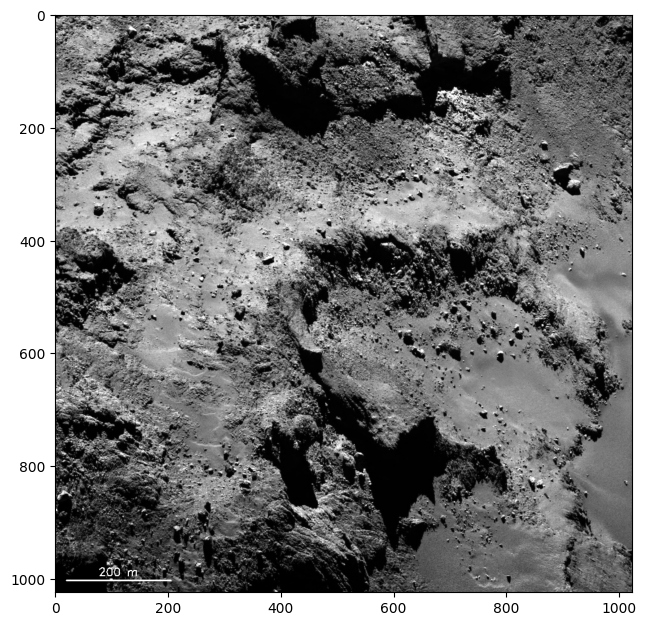

In [31]:
image_name = "rosetta.jpg"
image = Image.open(image_name)
data = np.array(image).astype(np.double)
if "rosetta" in image_name:
    data = data[:, :, 0]
max = data.max()
min = data.min()
data = data / max
print(data.shape)
data_flat = data.flatten()

plt.imshow(data, cmap="gray")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.show()

## Experiment setup

In [55]:
# p = percentage of observations to be regarded as seen
p = 0.5
# uo is number of used observations for estimating parameters
uo = 10000
# kappa can be chosen to be different than estimates
kappa_setting = None

## Run full experiment

Estimated regression parameters:  [ 4.39008166e-01 -1.20266478e-04  8.09218299e-06]
Estimated variogram parameters (nu_fixed=False):  {'sigma': 0.17843539535068395, 'kappa': 0.020057489672353223, 'nu': 1.0006794998133421, 'sigma_e': 0.17023006969090337}


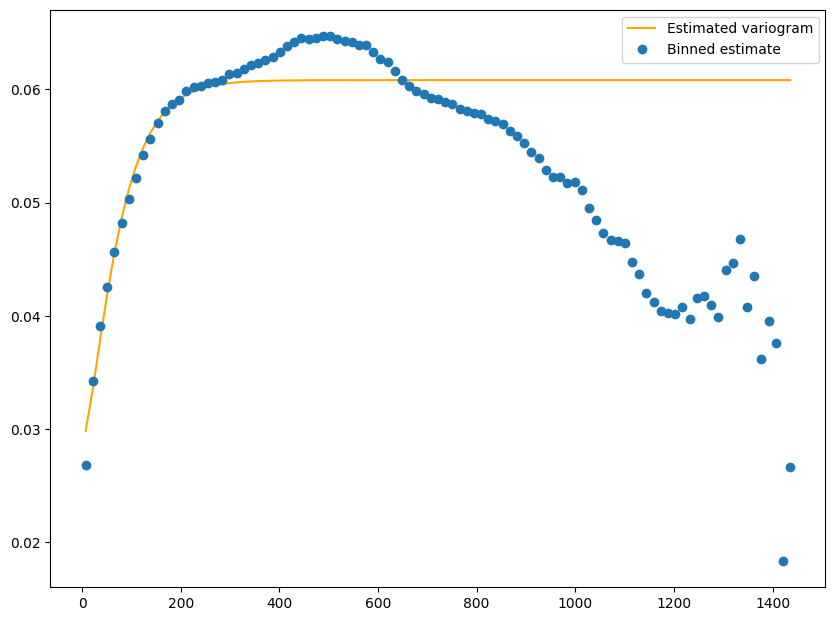

--------------------------------------------------
Optimal kappa: 0.3172844147545377
--------------------------------------------------


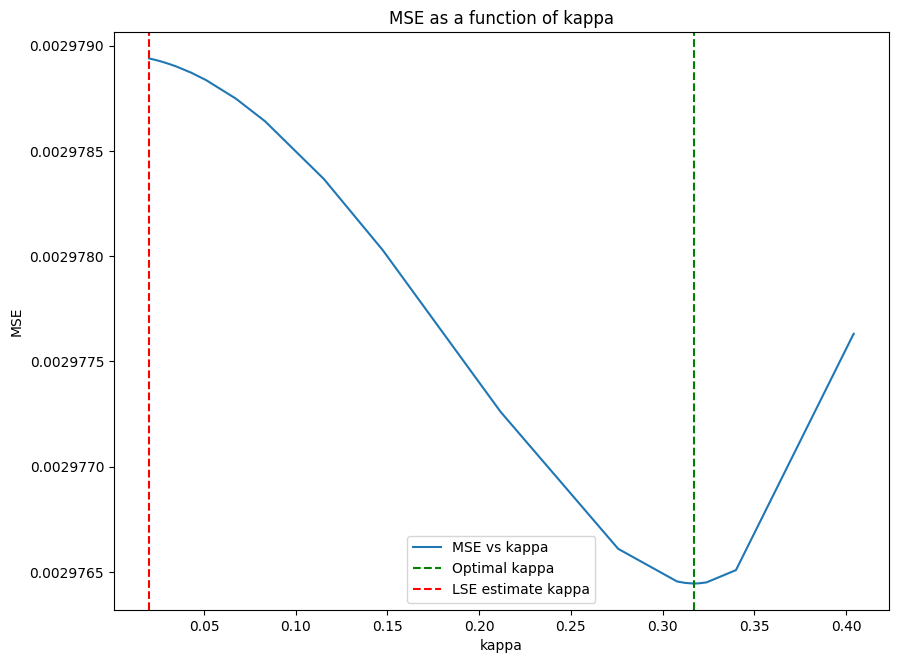

##########       Reconstructing data with optimal kappa       ##########
Q is about to be calculated
Q was calculated in  0.741398542013485  seconds
Covariance plot is about to be calculated
Covariance plot was calculated in  34.20349801599514  seconds


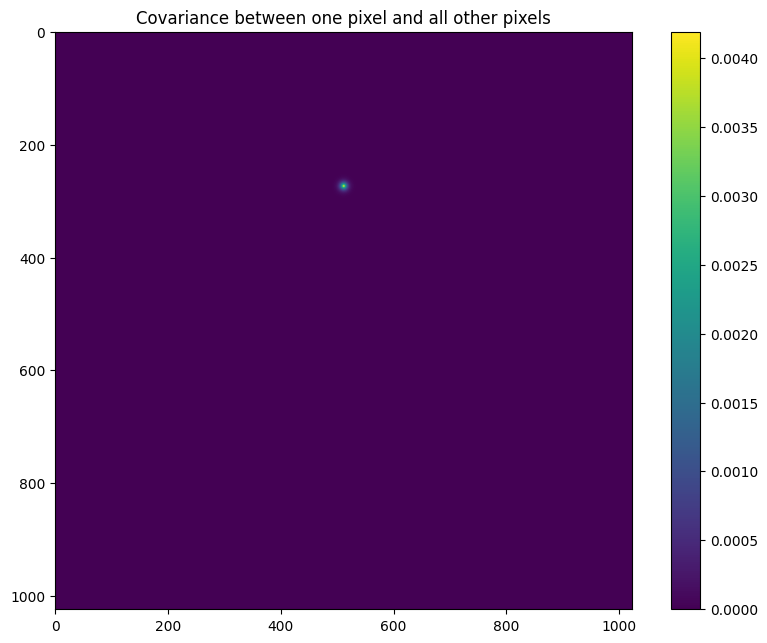

Kriging is about to be calculated
Kriging was calculated in  0.9036692500230856  seconds
cg method returned 'true' result:  True
--------------------------------------------------
MSE for kappa=0.3172844147545377 and proportion of seen observations=0.5: 0.0029764451146085482
--------------------------------------------------


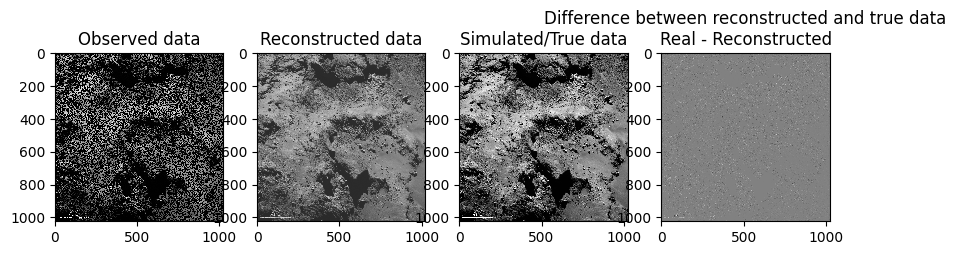

##########         Reconstructing data with LSE kappa         ##########
Q is about to be calculated
Q was calculated in  1.4296283749863505  seconds
Covariance plot is about to be calculated
Covariance plot was calculated in  34.569140558014624  seconds


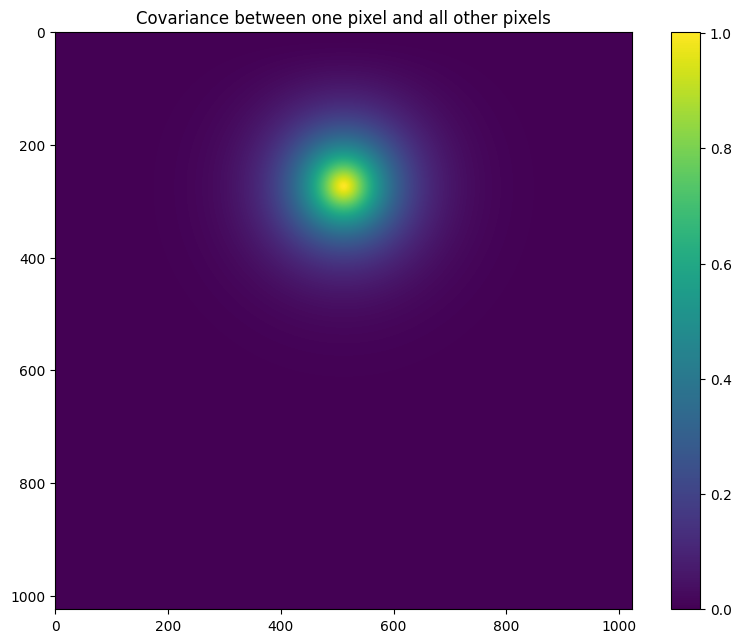

Kriging is about to be calculated
Kriging was calculated in  1.231374875002075  seconds
cg method returned 'true' result:  True
--------------------------------------------------
MSE for kappa=0.020057489672353223 and proportion of seen observations=0.5: 0.002978939668241123
--------------------------------------------------


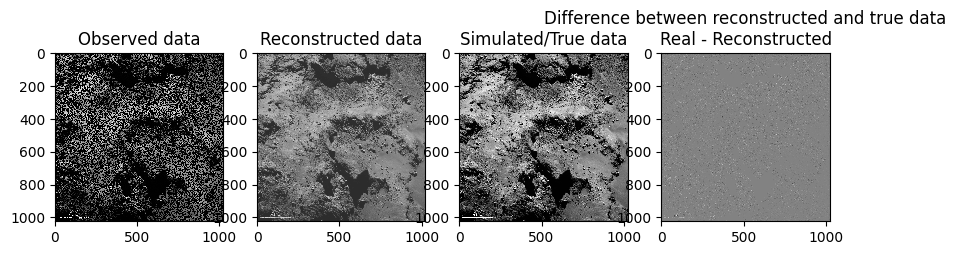

--------------------------------------------------
Optimal kappa improved MSE by: 0.001%
--------------------------------------------------


In [58]:

run_reconstruction(
    data=data, 
    p=p, 
    uo=uo, 
    nu_fixed=False,
    show_mid_cov=True, 
    plot_reconstruction=True,
    kappa_setting=kappa_setting,
    find_min_kappa=True
    )

## Walk through experiment

### Testing of simulated data to search for errors

In [ ]:
kappa = 1
m1 = 215
m2 = 126
# q represents a stencil for a precision matrix Q where
#a pixel ij is only affected by its 4 neighbours with sharing sides.
#Since the neighbours have values of -1 they all contribute the same
#to the concerned pixel

q1 = kappa**2 * np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]) + np.array([[0, -1, -10], [-1, 24, -1], [-10, -1, 0]])
q2 = np.array([[-10, -0.1, 0], [-0.1, 20.4+kappa**2, -0.1], [0, -0.1, -10]])
q3 = np.array([[0, -1, -10], [-1, 24+kappa**2, -1], [-10, -1, 0]])
q4 = np.array([[-1, -5, -1], [-5, 24+kappa**2, -5], [-1, -5, -1]])
q5 = q2 + q3
# stencil2prec returns a sparse matrix

Q = stencil2prec([m1, m2], q1)
print(Q.shape)
# multiply together Q to get a broader neighbourhood influence.
#Q = Q @ Q

# covariance between the middle pixel and all other pixels:
v = np.zeros(m1*m2)
v[(m1*m2)//2 + 90] = 1

c = spsolve(Q, v)
factor = cholesky_sparse(Q)

x = factor(np.random.randn((m1*m2))).reshape(m1, m2, order="F")
print(x.shape)

plt.imshow(x, cmap="gray")
plt.show()
plt.imshow(data.ravel(order="F").reshape(m1, m2, order="F"), cmap="gray")
plt.show()